<font color="green">*To start working on this notebook, or any other notebook that we will use in the Moringa Data Science Course, we will need to save our own copy of it. We can do this by clicking File > Save a Copy in Drive. We will then be able to make edits to our own copy of this notebook.*</font>

# Python Programming: Outliers

### **Overview**

During this session, we will get to learn about outliers found in datasets. We will learn how we can find them, their implications during analysis and how to deal with them.

By definition, outliers are data points that differ greatly from the rest of the observations in a dataset.  A few examples of outliers include:

*   Say during an exam, there's a student score of 20% while the rest of the scores are around 80%. The score of 20% is an outlier.
*   A customer purchases shopping worth Ksh. 100, 000 while most customers shopping worth is Ksh. 3,000. The Ksh. 100, 000 is an outlier.

There are many sources of outliers some of which include:
1.   **Human error**: Errors in data entry
2.   **Intentional reporting of incorrect data**: Under-reporting or over-reporting, fraud, etc.
2.  **Sampling error**: Data collected from different target audiences.

**Why do we need to detect outliers?**

The presence of outliers in our dataset can sometimes distort our analysis. This is evident in certain cases where our models are sensitive to the training data i.e. linear regression. In other cases, detecting outliers helps us to further understand the system from which we collected our data. The following two suggested readings should provide us with guidelines on removing and handling outliers in data. 

Overall, if an outlier is due to some type of error, then its usually best practice to exclude the data from analysis i.e. by deleting the data. On the other hand, if the outlier was as a result of some natural process of the system where the experiment/or the data was being collected, then the outlier should not be removed.


## Examples

### 1. Finding Outliers

#### Example 1: Box Plot

In [3]:
# Example 1 
# ---
# Visualising outliers using box plot.
# ---
# A boxplot is a method for graphically depicting groups of numerical data 
# through their quantiles or the five-number summary 
# (minimum, first quartile (Q1), median, third quartile (Q3), and maximum). 
# This method is normally used to detect outliers. 
# ---
# Dataset url = http://bit.ly/OutlierDataset
#

# Importing the required libraries
# 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
# %matplotlib inline 

# Loading the dataset 
# 
df = pd.read_csv("http://bit.ly/OutlierDataset") 

# Display 5 rows of dataset 
# 
df.head() 

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:>

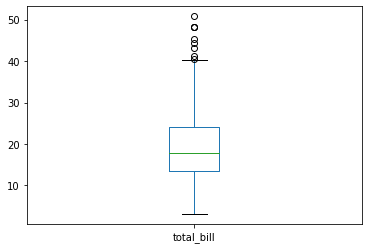

In [4]:
# Creating a box plot of the variable 'total_bill'
# ---
# 
df.boxplot(column =['total_bill'], grid = False) 

# NB:
# The circles in the plot indicate outliers and there are many.

<AxesSubplot:title={'center':'total_bill'}, xlabel='day'>

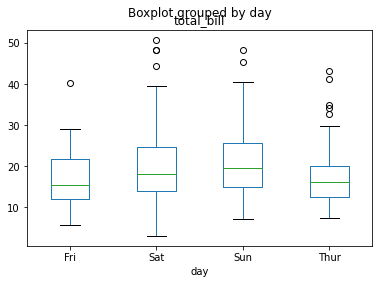

In [5]:
# It is also possible to identify outliers using more than one variables as shown
# ---
#  
df.boxplot(column =['total_bill'], by ='day', grid = False)

Text(0, 0.5, 'Life Expectancy')

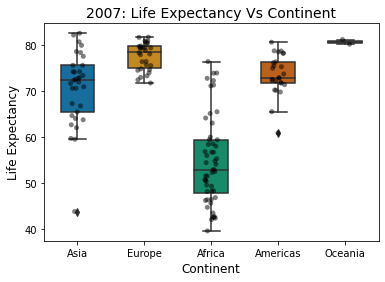

In [9]:
# Example 1-2: Outliers - Box plot (Multiple variables)
# ---
# Another way of finding outliers of multiple variables is by creating a box plot as shown below
# ---
# 

# Importing the seaborn library
# ---
#
import seaborn as sns

# Reading data from url as dataframe
# ---
# 
gapminder = pd.read_csv("http://bit.ly/FiveYearData") 

# Filtering the data such that we will keep data from all countries for the year 2007
gapminder_2007 = gapminder[gapminder['year']==2007] 

# We then specify from the multiple options to customize the boxplot with Seaborn.
# We choose color palette scheme for the boxplot with Seaborn. 
# Here, we chose colorblind friendly palette “colorblind”. 
# Other color palette options available in Seaborn include deep, muted, bright, pastel, and dark.
# Uncomment the line below after running the previous lines
bplot = sns.boxplot(y='lifeExp', x='continent', data=gapminder_2007, width=0.5, palette="colorblind")

# Boxplot alone is extremely useful in getting the summary of data within and between groups. 
# However, often, it is a good practice to overlay the actual data points on the boxplot.
# We use jitter = True option to spread the data points horizontally and also 
# make boxplot with data points using stripplot.
# Uncomment the line below after running the previous lines
bplot=sns.stripplot(y='lifeExp', x='continent',  data=gapminder_2007, jitter=True, marker='o', alpha=0.5, color='black')

# We then name and size our graph and axis
# Uncomment the lines below after running the previous lines
bplot.axes.set_title("2007: Life Expectancy Vs Continent", fontsize=14)
bplot.set_xlabel("Continent", fontsize=12)
bplot.set_ylabel("Life Expectancy", fontsize=12)

#### Example 2: Histogram

<AxesSubplot:>

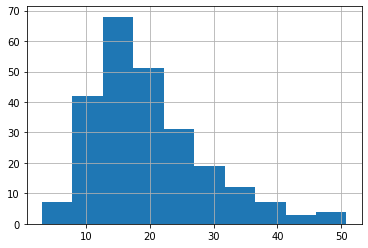

In [10]:
# Example 2
# ---
# We use a histogram to visualize the distibution of a numerical variable.
# The created histogram shows that the distribution is right-skewed 
# and there are extreme higher values at the right of the histogram.
# ---
# 
df.total_bill.hist()

#### Example 3: Scatter Plot

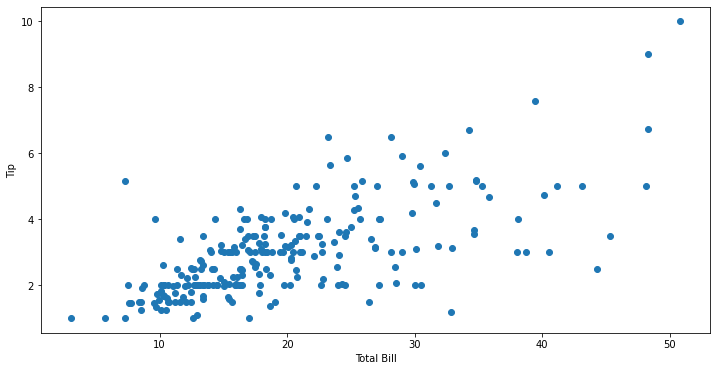

In [11]:
# Example 3
# ---
# The scatterplot will visualize the relationship between two quantitative variables. 
# The data points will be displayed as a collection of points. 
# Data points outside the general clustering of the two variables can be indicated as outliers.
# ---
# 
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(df['total_bill'], df['tip'])
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')
plt.show()

#### Example 4: Z-Score

In [12]:
# Example 4: Outliers - Mathematical Function (Z-Score-)
# ---
# The Z-score is the signed number of standard deviations by which the value of an observation 
# or data point is above the mean value of what is being observed or measured.
# The intuition behind Z-score is to describe any data point by finding their 
# relationship with the Standard Deviation and Mean of the group of data points. 
# Z-score is finding the distribution of data where mean is 0 
# and standard deviation is 1 i.e. normal distribution.
# You must be wondering that, how does this help in identifying the outliers? 
# Well, while calculating the Z-score we re-scale and center the data 
# and look for data points which are too far from zero. 
# These data points which are way too far from zero will be treated as the outliers. 
# In most of the cases a threshold of 3 or -3 is used i.e 
# if the Z-score value is greater than or less than 3 or -3 respectively, 
# that data point will be identified as an outlier.
# ---
# We will create the following function to calculate our z-scores and detect our outliers
# ---
# 
outliers=[]

def detect_outlier(data_1):
    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

detect_outlier(df['total_bill'])

[48.27, 48.17, 50.81, 48.33]

In [ ]:
# we want to use a copy of boston_df 

# removing the outliers

boston_zf = df['total_bill'] [(z < 3).all(axis=1)]

boston_zf

### 2. Dealing with Outliers

#### Example 1: Dropping outliers

In [15]:
# Example 2: 
# ---
# IQR Score 
# ---
# The IQR score uses the IQR scores to remove the outliers. 
# The rule of thumb is that anything not in the range of 
# (Q1 - 1.5 IQR) and (Q3 + 1.5 IQR) is an outlier, and can be removed.
# ---
# Something to note about outlier methods is that they are likely to yield 
# different results due to the fact that they use different techniques (criteria) 
# for outlier detection
# ---
#

# Calculating our first, third quantiles and then later our IQR
# ---
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Removing outliers based on the IQR range and stores the result in the data frame 'df_out'
# ---
# 
df_out = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Printing the shape of our new dataset
# ---
# 
print(df_out.shape)

# Printing the shape of our old dataset
# ---
#
print(df.shape)

(223, 7)
(244, 7)


C:\Users\user\AppData\Local\Temp/ipykernel_9940/3210635258.py:24: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_out = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


## <font color="green">Challenges</font>

#### <font color="green">Challenge 1</font>

In [44]:
# Challenge 1
# ---
# Using a Box - Plot determine and remove the outliers in the following dataset 
# ---
# Dataset url = http://bit.ly/MSClimateDataset
# ---
# 
df = pd.read_csv('http://bit.ly/MSClimateDataset')
df

,yyyy/mm/dd,year,month,day,ave_temp,high_temp,low_temp,precip,daylight,snowfall,ave_wind_speed,high_wind_speed,high_wind_direc
0,1987/1/1,1987,1,1,6.7,9.5,4.0,0.0,9.3,0,7.3,12.7,NNW
1,1987/1/2,1987,1,2,2.9,4.7,1.1,2.5,0.0,0,4.4,7.8,NNW
2,1987/1/3,1987,1,3,5.9,9.3,1.3,2.0,0.8,0,2.5,5.9,N
3,1987/1/4,1987,1,4,6.8,11.9,3.2,0.0,8.9,0,4.9,8.0,NNW
4,1987/1/5,1987,1,5,2.7,4.7,0.5,6.0,0.0,1,4.2,8.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11318,2017/12/27,2017,12,27,4.5,9.2,1.0,0.0,9.0,0,3.1,5.6,NNW
11319,2017/12/28,2017,12,28,4.8,9.8,1.1,0.0,9.0,0,3.3,6.0,NW
11320,2017/12/29,2017,12,29,6.1,10.5,2.3,0.0,8.6,0,3.4,6.7,NW
11321,2017/12/30,2017,12,30,6.2,11.1,1.0,0.0,8.9,0,2.8,5.8,NW


(array([1722, 2430, 3552, 6491], dtype=int64),)


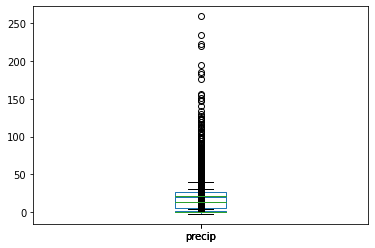

In [49]:
df.boxplot(column =['high_temp'], grid = False)
df.boxplot(column =['low_temp'], grid = False)
df.boxplot(column =['precip'], grid = False)


# Position of the Outlier
print(np.where(df['precip']>200))
# df.boxplot(column =['low_temp'], grid = False)

#### <font color="green">Challenge 2</font>

In [52]:
# Challenge 2
# ---
# Attached is a set of products in which a sales and marketing team are trying to determine 
# which products we should continue to sell, and which products to remove from our inventory. 
# The file contains BOTH historical sales data AND active inventory, 
# which can be discerned with the column titled "File Type".
# Find and deal with outliers in this dataset;
# ---
# Dataset url = http://bit.ly/MSProductSales
# ---
# 
df = pd.read_csv('SalesKaggle3.csv')
df

,Order,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
0,2,Historical,1737127,0.0,0.0,D,15,1,6.827430e+05,44.99,2015,8,28.97,31.84
1,3,Historical,3255963,0.0,0.0,D,7,1,1.016014e+06,24.81,2005,39,0.00,15.54
2,4,Historical,612701,0.0,0.0,D,0,0,3.404640e+05,46.00,2013,34,30.19,27.97
3,6,Historical,115883,1.0,1.0,D,4,1,3.340110e+05,100.00,2006,20,133.93,83.15
4,7,Historical,863939,1.0,1.0,D,2,1,1.287938e+06,121.95,2010,28,4.00,23.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198912,208023,Active,109683,NaN,NaN,D,7,1,2.101869e+05,72.87,2006,54,8.46,60.59
198913,208024,Active,416462,NaN,NaN,D,8,1,4.555041e+05,247.00,2009,65,8.40,74.85
198914,208025,Active,658242,NaN,NaN,S,2,1,1.692746e+05,50.00,2012,23,23.98,32.62
198915,208026,Active,2538340,NaN,NaN,S,2,1,3.775266e+05,46.95,2001,23,27.42,37.89


#### <font color="green">Challenge 3</font>

In [53]:
# Challenge 3
# ---
# Brazilian politicians are entitled to refunds if they spend any of their money 
# on an activity that is enabling them to "better serve the people".
# Those expenses are public data, however, there is little monitoring/data analysis of it. 
# A quick look at it shows a deputy with over 800 flights in one year. 
# Another deputy has over 140.000R$ expenses on mailing (old fashion mail) in one year.
# There are a lot of very suspicious data regarding the deputies expending behavior. 
# Can you help spot outliers and companies charging unusual amounts of money for a service?
# ---
# Dataset url = http://bit.ly/MSBrazilPoliticians
# ---
# 

data = pd.read_csv('dirty_deputies_v2.csv')
data

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (10,12,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,deputy_name,deputy_state,political_party,refund_description,company_name,company_id,refund_date,refund_value,party_pg,party_en,party_tse,party_regdate,party_nmembers,party_ideology1,party_ideology2,party_ideology3,party_ideology4,party_position
0,PROFESSORA DORINHA SEABRA REZENDE,TO,DEM,FLIGHT TICKET,Cia Aérea - TAM,2.012862e+12,2016-07-29T00:00:00,937.63,Democratas,Democrats,25,11-09-86,1095712,Economic liberalism,Liberal conservatism,Christian democracy,NaN,Rightwing
1,JOSÉ CARLOS ALELUIA,BA,DEM,FUEL COSTS,CASCOL COMBUSTIVEIS PARA VEICULOS LTDA,3.065970e+11,2016-06-21T00:00:00,150.00,Democratas,Democrats,25,11-09-86,1095712,Economic liberalism,Liberal conservatism,Christian democracy,NaN,Rightwing
2,JOSÉ CARLOS ALELUIA,BA,DEM,FUEL COSTS,CASCOL COMBUSTIVEIS PARA VEICULOS LTDA,3.065970e+11,2016-06-01T00:00:00,100.00,Democratas,Democrats,25,11-09-86,1095712,Economic liberalism,Liberal conservatism,Christian democracy,NaN,Rightwing
3,JOSÉ CARLOS ALELUIA,BA,DEM,FUEL COSTS,MEGA POSTO BERIMBAU LTDA - ME,1.855960e+12,2016-04-19T00:00:00,168.07,Democratas,Democrats,25,11-09-86,1095712,Economic liberalism,Liberal conservatism,Christian democracy,NaN,Rightwing
4,JOSÉ CARLOS ALELUIA,BA,DEM,FUEL COSTS,MEGA POSTO BERIMBAU LTDA - ME,1.855960e+12,2016-08-13T00:00:00,239.57,Democratas,Democrats,25,11-09-86,1095712,Economic liberalism,Liberal conservatism,Christian democracy,NaN,Rightwing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339084,SDD,NaN,NaN,MEAL COSTS,WASHINGTON KLAY CARDOSO,2.351792e+13,2016-04-29T00:00:00,2100.00,Nan,Nan,Nan,Nan,Nan,Nan,Nan,Nan,Nan,Nan
339085,SDD,NaN,NaN,MEAL COSTS,WASHINGTON KLAY CARDOSO,2.351792e+13,2016-04-29T00:00:00,750.00,Nan,Nan,Nan,Nan,Nan,Nan,Nan,Nan,Nan,Nan
339086,SDD,NaN,NaN,MEAL COSTS,WASHINGTON KLAY CARDOSO,2.351792e+13,2016-05-31T00:00:00,2670.00,Nan,Nan,Nan,Nan,Nan,Nan,Nan,Nan,Nan,Nan
339087,SDD,NaN,NaN,MEAL COSTS,WASHINGTON KLAY CARDOSO,2.351792e+13,2016-06-30T00:00:00,2400.00,Nan,Nan,Nan,Nan,Nan,Nan,Nan,Nan,Nan,Nan
